<a href="https://colab.research.google.com/github/amirarasteh1990/Examples/blob/main/Edwin_with_verbose_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git@dev2#egg=ed_win[interarray]

DEPRECATION: git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git@dev2#egg=ed_win[interarray] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git (to revision dev2) to /tmp/pip-install-xlsuokig/ed-win_82fe720e3dcd421ea14716f6266659ec
  Running command git clone --filter=blob:none --quiet https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git /tmp/pip-install-xlsuokig/ed-win_82fe720e3dcd421ea14716f6266659ec
  Running command git checkout -b dev2 --track origin/dev2
  Switched to a new branch 'dev2'
  Branch 'dev2' set up to track remote branch 'dev2' from 'origin'.
  Resolved https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git to commit 7dc0171a4c2ada2cbcf92082996a46daace64716
  Running command git submodule update --init --recursive -q
  

In [2]:
from ed_win.wind_farm_network import WindFarmNetwork, InterArrayDriver, GeneticAlgorithmDriver
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Turbine and substation positions
ss_x = [497620.7]
ss_y = [5730622.0]
wt_x = [500968.1461, 499748.6565, 501245.7744, 500026.2848,
        498527.8286, 497308.339, 501523.4027, 500303.9131,
        498805.4569, 497585.9673, 496087.5111, 494868.0215,
        501801.031, 500581.5414, 499083.0852, 497863.5956,
        496365.1394, 495145.6498, 493647.1936, 492427.704,
        502078.6593, 500859.1697, 499360.7135, 498141.2239,
        496642.7677, 495423.2781, 493924.8219, 492705.3323,
        491206.8762, 489987.3865, 502356.2876, 501136.798,
        499638.3418, 498418.8522, 496920.396, 495700.9064,
        494202.4502, 492982.9606, 491484.5045, 490265.0148,
        488766.5587, 487547.069, 502633.9159, 501414.4263,
        499915.9701, 498696.4805, 497198.0243, 495978.5347,
        494480.0786, 493260.5889, 491762.1328, 490542.6431,
        489044.187, 487824.6973, 486326.2412, 485106.7515,
        497475.6526, 496256.163, 494757.7069, 493538.2172,
        492039.7611, 490820.2714, 489321.8153, 488102.3256,
        486603.8695, 497753.2809, 496533.7913, 495035.3352,
        493815.8455, 492317.3894, 489599.4436, 498030.9093,
        496811.4196, 495312.9635]
wt_y = [5716452.784, 5717635.848, 5718427.22, 5719610.283,
        5718809.394, 5719992.458, 5720401.656, 5721584.719,
        5720783.83, 5721966.894, 5721166.004, 5722349.068,
        5722376.092, 5723559.155, 5722758.266, 5723941.33,
        5723140.44, 5724323.504, 5723522.615, 5724705.678,
        5724350.528, 5725533.591, 5724732.702, 5725915.765,
        5725114.876, 5726297.94, 5725497.051, 5726680.114,
        5725879.225, 5727062.288, 5726324.963, 5727508.027,
        5726707.138, 5727890.201, 5727089.312, 5728272.376,
        5727471.486, 5728654.55, 5727853.661, 5729036.724,
        5728235.835, 5729418.899, 5728299.399, 5729482.463,
        5728681.574, 5729864.637, 5729063.748, 5730246.812,
        5729445.922, 5730628.986, 5729828.097, 5731011.16,
        5730210.271, 5731393.335, 5730592.445, 5731775.509,
        5731038.184, 5732221.248, 5731420.358, 5732603.422,
        5731802.533, 5732985.596, 5732184.707, 5733367.77,
        5732566.881, 5733012.62, 5734195.683, 5733394.794,
        5734577.858, 5733776.968, 5734159.143, 5734987.056,
        5736170.119, 5735369.23]

In [4]:
cables = np.array([[500, 3, 206], [800, 5, 287], [1000, 7, 406]])

In [5]:
wfn = WindFarmNetwork(wt_x=wt_x, wt_y=wt_y, ss_x=ss_x, ss_y=ss_y, cables=cables)

In [6]:
G1 = wfn.optimize(verbose=False)

<Axes: >

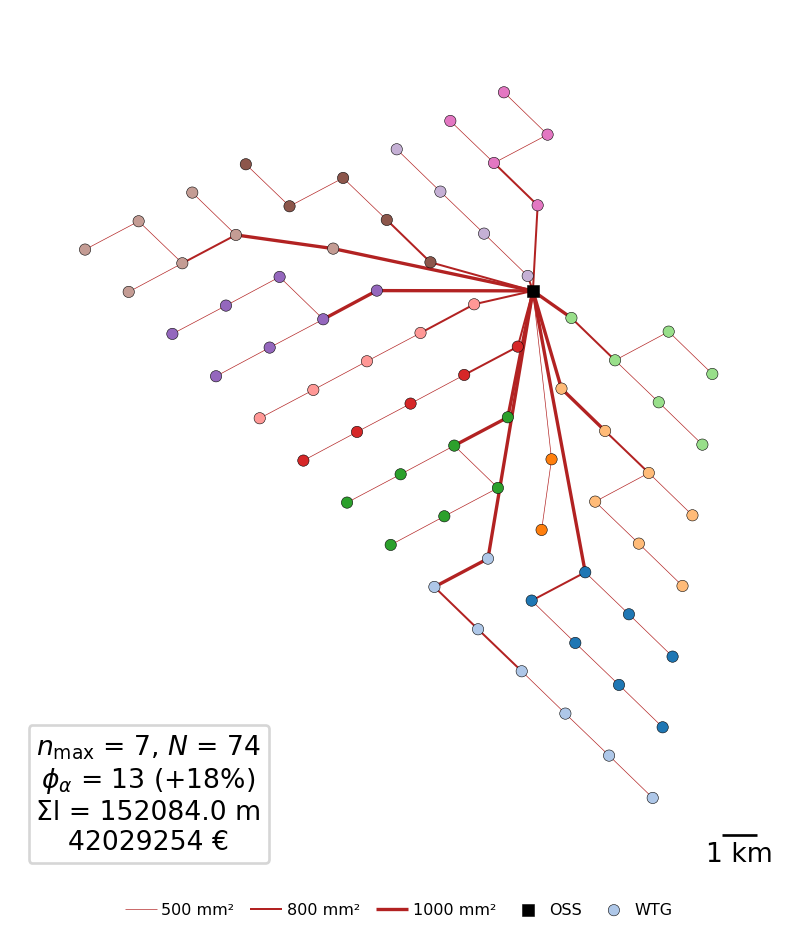

In [7]:
G1.plot()

In [8]:
G2 = wfn.evaluate(ss_x=499620.7, ss_y=5731622.0, verbose=False)

In [9]:
G2.plot()

In [10]:
# Gradient with internal coordinates
grad_length, grad_cost = wfn.gradient()

In [11]:
print('Gradient of the total cable length is:\n', grad_length)
print('----------------------------------------------------')
print('Gradient of the total cable cost is:\n', grad_cost)

Gradient of the total cable length is:
 [[ 7.17744883e-01 -6.96306170e-01]
 [ 3.18464550e-03  3.29779026e-03]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [-3.18464550e-03 -3.29779026e-03]
 [ 3.18464550e-03  3.29779026e-03]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [-3.18435047e-03 -3.29748334e-03]
 [-1.60183049e+00  2.28981188e-01]
 [-3.18464550e-03 -3.29779026e-03]
 [-1.60183049e+00  2.28981188e-01]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [ 3.45987546e-01  1.77189344e-01]
 [-1.39241738e-01 -9.90258420e-01]
 [ 7.18579371e-01 -5.18883762e-01]
 [-2.15149121e-03  4.04770994e-03]
 [-8.81934116e-01 -4.71372692e-01]
 [-8.84085364e-01 -4.67325443e-01]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 8.85118173e-01  4.74669872e-01]
 [-1.60286335e+00  2.21635995e-01]
 [ 2.49174418e-01 -3.68061541e-03]
 [ 1.60183049e+00 -2.28981188e-01]
 [-7.19896375e-01  7.00353880e-01]
 [ 2.15124723e-03 -4.04724839e-03]
 [-2.15150429e-

In [12]:
# Gradient with new coordinates (but same layout)
grad_length_new, grad_cost_new = wfn.gradient(ss_x=499620.7, ss_y=5731622.0, verbose=False)

In [13]:
print('Gradient of the total cable length is:\n', grad_length_new)
print('----------------------------------------------------')
print('Gradient of the total cable cost is:\n', grad_cost_new)

Gradient of the total cable length is:
 [[ 7.17744883e-01 -6.96306170e-01]
 [ 3.18464550e-03  3.29779026e-03]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [-3.18464550e-03 -3.29779026e-03]
 [ 3.18464550e-03  3.29779026e-03]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [-3.18435047e-03 -3.29748334e-03]
 [-1.60183049e+00  2.28981188e-01]
 [-3.18464550e-03 -3.29779026e-03]
 [-1.60183049e+00  2.28981188e-01]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 3.18405632e-03  3.29718014e-03]
 [ 1.02614324e-01  1.62168021e-01]
 [-1.39241738e-01 -9.90258420e-01]
 [ 5.25737348e-01 -4.66263003e-01]
 [-2.15149121e-03  4.04770994e-03]
 [-8.81934116e-01 -4.71372692e-01]
 [-8.84085364e-01 -4.67325443e-01]
 [ 7.17745178e-01 -6.96305867e-01]
 [ 8.85118173e-01  4.74669872e-01]
 [-1.60286335e+00  2.21635995e-01]
 [-1.11733429e-01  2.22648946e-02]
 [ 1.60183049e+00 -2.28981188e-01]
 [-7.19896375e-01  7.00353880e-01]
 [ 2.15124723e-03 -4.04724839e-03]
 [-2.15150429e-

In [14]:
# To check the new coordinates really are considered when calculating the gradient
print('Diff in length gradient with new coordinates:\n', grad_length - grad_length_new)
print('----------------------------------------------------')
print('Diff in cost gradient with new coordinates:\n', grad_cost - grad_cost_new)

Diff in length gradient with new coordinates:
 [[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.24337322  0.01502132]
 [ 0.          0.        ]
 [ 0.19284202 -0.05262076]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.36090785 -0.02594551]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.58699635 -0.00801534]
 [ 0.31735071 -0.12180885]
 [ 0.   